<a href="https://colab.research.google.com/github/rai3mb/iesb/blob/master/Aprendizado_por_reforco_2_multiplos_bandidos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exemplo para problema dos k bandidos armados - seleção de ação greedy

- Esse exercício envolve bandidos que têm recompensas ditadas por distribuições uniformes.

**COMO DETERMINAR A EXPECTATIVA DE DISTRIBUIÇÕES UNIFORMES?**

* A função `numpy.random.uniform` não permite receber como parâmetro a média da distribuição uniforme. Isso porque a distribuição uniforme é caracterizada pelo intervalo de definição da distribuição: `x = [a, b)`. Com isso, a função densidade da distribuição é dada por `f(x) = 1/(b - a)`, já que todos os elementos deverão ser equiprováveis.


* A esperança (média) de uma distribuição uniforme é determinada pelo intervalo [a, b) de definição. `E[X] = (1/2) * (a + b)`. Portanto, para induzir uma média adequada, basta definir adequadamente o intervalo da distribuição uniforme.

* Em um intervalo unitário [0, 1), a expectativa é 1/2 = (1/2) * (0 + 1). Já em um intervalo [-0.5, 0.5), a expectativa é 0. Portanto, basta definir uma distribuição uniforme em [-0.5, 0.5) e somar a média desejada ao valor. 

* Isso será equivalente a deslocar o intervalo para `[-0.5 + media_desejada, 0.5 + media_desejada]`. Calculando a expectation: 

`E[X] = (1/2) * (-0.5 + media_desejada + 0.5 + media_desejada)`

`E[X] = (1/2) * (2 * media_desejada)`

`E[X] = media_desejada`

**DICA: para debugar e entender o código, utilize a função `pdb.set_trace()`. Ao rodar o código a execução parará na linha especificada. Você poderá acompanhar passo a passo o programa, realizar prints, avaliar expressões, verificar valores de variáveis, etc.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd

## Exemplo 1

In [2]:
class Bandit:
  """ Classe que define um bandido com recompensa seguindo uma distribuição 
      uniforme
  """

  def __init__(self, true_mean):
    """ Para caracterizar a distribuição uniforme, basta inicializar com média. 
    """
    self.q = true_mean
    self.Q_t = 0
    self.t = 0
    self.low = -0.5 + self.q
    self.high = 0.5 + self.q

  def pull(self):
    """ Método que define a interação com o bandido. A recompensa é resultante
        de uma distribuição uniforme de média especificada.
    """
    return np.random.uniform(low=self.low, high=self.high)

  def update(self, curr_reward):
    """ Método responsável por atualizar a estimação da expectativa da 
        recompensa
    """
    self.t += 1
    self.Q_t = self.Q_t + (1.0/self.t) * (curr_reward - self.Q_t)

In [3]:
def greedy_policy(bandits):
  """ Função responsável por escolher o bandido segundo uma estratégia greedy.
      Retorna o bandido correspondente à greedy action.
  """
  Q_values = [b.Q_t for b in bandits]
  greedy_index = np.argmax(Q_values)
  greedy_bandit = bandits[greedy_index]
  return greedy_bandit, greedy_index

In [4]:
def interact_with_bandit(bandit):
  """ Função que interage com um bandido. A interação envolve a coleta da 
      recompensa e a atualização da média estimada.
  """
  # Coleta a recompensa da interação
  reward = bandit.pull()

  # Atualiza a estimação da média
  bandit.update(reward)

  return reward

In [6]:
def run_greedy_bandits_experiment(bandits_array, num_iterations):
  """ Simula um cenário dos banditos com a escolha greedy de ação """
  rewards_array = np.empty(num_iterations)

  for n in np.arange(num_iterations):
    # Sempre há escolha da ação greedy.
    greedy_bandit, greedy_index = greedy_policy(bandits_array)

    # Realiza a interação com o bandido que corresponde à ação greedy
    curr_reward = interact_with_bandit(greedy_bandit)

    rewards_array[n] = curr_reward

  return rewards_array

In [7]:
def get_mean_cumulative_reward(reward_array):
  cumulative_reward = np.cumsum(reward_array)
  mean_cumulative_reward = cumulative_reward / (np.arange(len(reward_array)) + 1)
  return mean_cumulative_reward

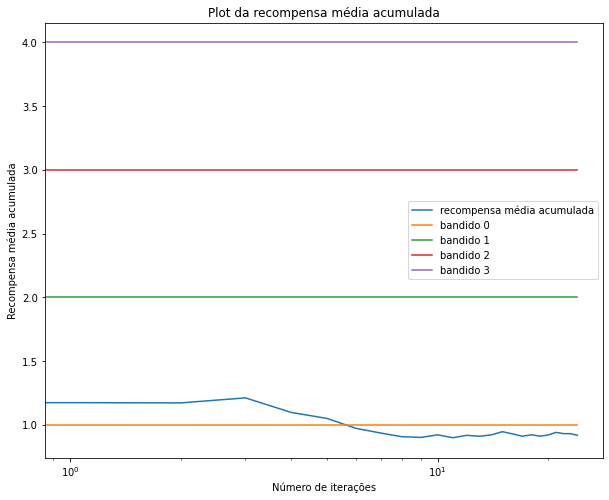

In [8]:
def main(num_iterations):
  """ Método principal """
  mean_array = [1.0, 2.0, 3.0, 4.0]
  bandits_array = list(map(lambda mean: Bandit(mean), mean_array))

  rewards_array = run_greedy_bandits_experiment(bandits_array, num_iterations)

  # Calculando a recompensa acumulada
  mean_cumulative_reward = get_mean_cumulative_reward(rewards_array)
  
  # Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.figure(figsize=(10,8))
  plt.plot(mean_cumulative_reward)
  legends = ['recompensa média acumulada']
  for cont, b in enumerate(bandits_array):
    plt.plot(np.ones(num_iterations) * b.q)
    legends.append('bandido ' + str(cont))
  plt.xscale('log')
  plt.xlabel('Número de iterações')
  plt.ylabel('Recompensa média acumulada')
  plt.title('Plot da recompensa média acumulada')
  plt.legend(legends)
  plt.show()

main(num_iterations=25)

## 1.1 Repita o experimento acima algumas vezes. O resultado é sempre o mesmo. Porque? Que tipo de informação você poderia exibir para tentar entender o que está acontecendo?

## 1.2 Pela lei dos grandes números, ao interagir várias vezes com um mesmo bandido, a média das recompensas deveria convergir para a expectativa da variável aleatória. Porque isso não está acontecendo de maneira muito precisa até então? O que seria necessário fazer para que a estimação da média convergisse para a expectativa?

## Exemplo 2

In [ ]:
def aleatory_exploration(bandits, num_iterations):
  """ Método que faz interações aleatórias com os bandidos num_iterações vezes.
      Isso permite uma inicialização da estimação do action-value diferente de 0.
      É algo necessário para que o greedy não fique preso apenas em interações
      com único bandido
  """
  for n in range(num_iterations):
    b = np.random.choice(bandits)

    # Nessa etapa inicial de exploração, os rewards não serão armazenados.
    interact_with_bandit(b)

In [ ]:
def run_greedy_bandits_experiment_with_initial_exploration(
    bandits_array, greedy_iterations, exploration_iterations):
  """ Simula um cenário dos banditos com a escolha greedy de ação """

  # Faz a exploração inicial para estimar um valor inicial para Q_t
  aleatory_exploration(bandits_array, exploration_iterations)

  rewards_array = np.empty(greedy_iterations)

  for n in np.arange(greedy_iterations):
    # Sempre há escolha da ação greedy.
    greedy_bandit, greedy_index = greedy_policy(bandits_array)

    # Realiza a interação com o bandido que corresponde à ação greedy
    curr_reward = interact_with_bandit(greedy_bandit)

    rewards_array[n] = curr_reward

  return rewards_array

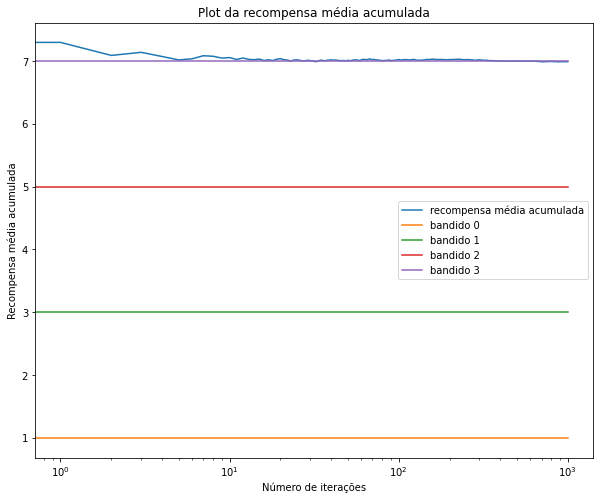

In [ ]:
def main2(exploration_iterations, greedy_iterations, mean_array):
  """ Método principal """
  bandits = list(map(lambda mean: Bandit(mean), mean_array))

  rewards_array = run_greedy_bandits_experiment_with_initial_exploration(
      bandits, greedy_iterations, exploration_iterations)

  # Calculando a recompensa acumulada
  mean_cumulative_reward = get_mean_cumulative_reward(rewards_array)
  
  # Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.figure(figsize=(10,8))
  plt.plot(mean_cumulative_reward)
  legends = ['recompensa média acumulada']
  for cont, b in enumerate(bandits):
    plt.plot(np.ones(greedy_iterations) * b.q)
    legends.append('bandido ' + str(cont))
  plt.xscale('log')
  plt.xlabel('Número de iterações')
  plt.ylabel('Recompensa média acumulada')
  plt.title('Plot da recompensa média acumulada')
  plt.legend(legends)
  plt.show()


main2(exploration_iterations=5, greedy_iterations=1000,
      mean_array=[1.0, 3.0, 5.0, 7.0])

## 2.1 É possível ver que o agente encontra a melhor escolha na maioria das vezes. O que faz o cenário ser tão fácil?

## 2.2 Em algumas situações, o agente não consegue encontrar a melhor solução. Mostre o que acontece nessas situações.

## 2.3 Em que situação esse cenário, de bandidos uniformes, seria mais desafiador? Crie um código que simule este cenário.

## Exemplo 3

In [ ]:
class BanditBinomial:
  """ Classe que define um bandido com recompensa seguindo uma distribuição 
      binomial
  """

  def __init__(self, n, p):
    """ Para caracterizar a distribuição uniforme, basta inicializar com média. 
    """
    self.q = n * p # A média verdadeira da distribuição
    self.n = n
    self.p = p
    self.Q_t = 0
    self.t = 0

  def pull(self):
    """ Método que define a interação com o bandido. A recompensa é resultante
        de uma distribuição uniforme de média especificada.
    """
    return np.random.binomial(n=self.n, p=self.p)

  def update(self, curr_reward):
    """ Método responsável por atualizar a estimação da expectativa da 
        recompensa
    """
    self.t += 1
    self.Q_t = self.Q_t + (1.0/self.t) * (curr_reward - self.Q_t)

In [ ]:
def fixed_exploration(bandits, num_explorations):
  """ Método que faz um número fixo de interações com cada bandido.
  """
  for b in bandits:
    for n in range(num_explorations):
      # Nessa etapa inicial de exploração, os rewards não serão armazenados.
      interact_with_bandit(b)

In [ ]:
def run_greedy_bandits_experiment_with_fixed_exploration(
    bandits_array, greedy_iterations, num_explorations):
  """ Simula um cenário dos banditos com a escolha greedy de ação """

  # Faz a exploração inicial para estimar um valor inicial para Q_t
  fixed_exploration(bandits_array, num_explorations)

  index_array = np.empty(greedy_iterations)
  rewards_array = np.empty(greedy_iterations)

  for n in np.arange(greedy_iterations):
    # Sempre há escolha da ação greedy.
    greedy_bandit, greedy_index = greedy_policy(bandits_array)

    # Realiza a interação com o bandido que corresponde à ação greedy
    curr_reward = interact_with_bandit(greedy_bandit)

    rewards_array[n] = curr_reward
    index_array[n] = greedy_index

  return rewards_array, index_array

Expectations iniciais do agente:
[14.0, 12.0, 13.5, 12.5, 10.5]


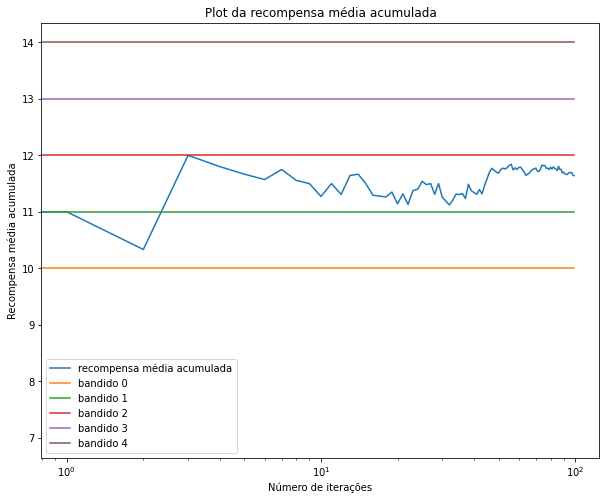

In [ ]:
def main3(num_explorations, greedy_iterations):
  """ Método principal """
  n = 100
  p_array = [0.1, 0.11, 0.12, 0.13, 0.14]
  bandits = list(map(lambda p: BanditBinomial(n=n, p=p), p_array))

  rewards_array, index_array = run_greedy_bandits_experiment_with_fixed_exploration(
      bandits, greedy_iterations, num_explorations)

  # Calculando a recompensa acumulada
  mean_cumulative_reward = get_mean_cumulative_reward(rewards_array)

# Fazendo o plot da expectativa real dos banditos versus a recompensa média
  # acumulada
  plt.figure(figsize=(10,8))
  plt.plot(mean_cumulative_reward)
  legends = ['recompensa média acumulada']
  for cont, b in enumerate(bandits):
    plt.plot(np.ones(greedy_iterations) * b.q)
    legends.append('bandido ' + str(cont))
  plt.xscale('log')
  plt.xlabel('Número de iterações')
  plt.ylabel('Recompensa média acumulada')
  plt.title('Plot da recompensa média acumulada')
  plt.legend(legends)
  plt.show()

main3(num_explorations=2, greedy_iterations=100)

## 3.1 Nem sempre o agente consegue encontrar a melhor solução nesse caso. Esse cenário é mais difícil do que os bandidos uniformes? Exiba e explique o motivo.

## 3.2 Qual a fraqueza do método greedy de aprendizado? Porque o agente nem sempre consegue um resultado ótimo?

**PENSE NISSO: A etapa de exploração é critica. Conseguiria pensar em alguma outra forma de fazer uma exploração adequada?**